In [1]:
import pandas as pd

file1 = pd.read_csv(r"C:\Users\krmch\OneDrive\Desktop\covid19-cdc-22203536.csv")
file2 = pd.read_csv(r"C:\Users\krmch\OneDrive\Desktop\start.csv")

#combine the 2 datasets by concatenating them together
combined_data = pd.concat([file1, file2], ignore_index=True)

combined_data.to_csv(r"C:\Users\krmch\OneDrive\Desktop\combined_data.csv", index=False)




Introduction

This assignment was completed by the following students 

Mohammed Choudhary 22203536 responsible for Q1 Q2 Q3 
Mohammed Syed 17305051 responsible for Q4 Q5

In this project I will clean and encode a dataset and then choose a set of features that will be best for predicting the target 
feature death_yn and then train linear regression logistic regression and random forest models using these features. 
I will compare the performance of the models and also discuss how to improve the performance. I will use 2 datasets provided from the CDC and combine them for the purposes of this assignment. I will also use methods to show the correlation between features when necessary using diagrams. 

In [2]:
import pandas as pd
import numpy as np


# Im going to print the numbers of missing values to get an idea about data quality 
print("Missing values per column:")
print(combined_data.isnull().sum())

# im going to check for duplicates to get an idea of the data quality 
print("\nDuplicate rows:")
print(combined_data.duplicated().sum())

# I will check the datatype of the features. When files are opened for reading many features are usually objects and 
# may need to be converted to the relevant datatypes 

print(combined_data.dtypes)


Missing values per column:
case_month                             0
res_state                              0
state_fips_code                        0
res_county                          2412
county_fips_code                    2412
age_group                            304
sex                                  807
race                                4520
ethnicity                           4949
case_positive_specimen_interval    19093
case_onset_interval                22766
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn           36463
dtype: int64

Duplicate rows:
3856
case_month                          object
res_state                           object
state_fips_code                    float64
res_county                    

In [3]:
# Im going to convert all the categorical features to the categorical datatype 
# Im planning on dropping res_state and res_county since they are just duplicate columns of fipscodes and dont provide any
# additional information so I wont bother changing them.

for i in ['case_month',  'state_fips_code',
       'county_fips_code',  'sex', 'race', 'ethnicity', 'process', 'age_group',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'] :

       combined_data[i] = pd.Categorical(combined_data[i])



print(combined_data.dtypes)

case_month                         category
res_state                            object
state_fips_code                    category
res_county                           object
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object


In [4]:
import numpy as np
import pandas as pd



# Im going to drop colums that have too many missing values.
threshold = 0.8
columns_to_drop = combined_data.columns[combined_data.isnull().mean() > threshold]
combined_data.drop(columns_to_drop, axis=1, inplace=True)


# Im going to remove rows that have too many missing values.
row_threshold = 0.5
combined_data.dropna(axis=0, thresh=int(row_threshold * combined_data.shape[1]), inplace=True)



numerical_columns = combined_data.select_dtypes(include=[np.number]).columns



combined_data[numerical_columns] = combined_data[numerical_columns].fillna(combined_data[numerical_columns].mean())


categorical_columns = combined_data.select_dtypes(include=[object]).columns

combined_data[categorical_columns] = combined_data[categorical_columns].fillna(combined_data[categorical_columns].mode().iloc[0])


# print the datatypes again to show the changes in datatypes.
print(combined_data.dtypes)

case_month                         category
res_state                            object
state_fips_code                    category
res_county                           object
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
dtype: object


In [5]:
# Drop 'res_state' and 'res_county' columns from the dataset because these are the same as state and county fips code i.e they 
# are not informative.
combined_data.drop(['res_state', 'res_county'], axis=1, inplace=True)

# This is the list of remaining categorical features.
categorical_features = [
    'case_month','state_fips_code',
       'county_fips_code',  'age_group', 'sex', 'race', 'ethnicity',
    'process', 'exposure_yn', 'current_status', 'symptom_status',
    'hosp_yn', 'icu_yn', 'death_yn'
]

# Im going to print the features and datatypes after res_state and res_county have been dropped 

print(combined_data.dtypes)


case_month                         category
state_fips_code                    category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
dtype: object


In [6]:
from scipy import stats

combined_data = combined_data.copy()

# create the list of continuous features 
continuous_features = ['case_positive_specimen_interval', 'case_onset_interval']

# Change all the negative values for continuous features to positive values because 
# the negative values dont make sense for these features. most likely mistakes 
combined_data[continuous_features] = combined_data[continuous_features].abs()

# Using Z scores we can remove the rows with outliers 
z_threshold = 3
z_scores = np.abs(stats.zscore(combined_data[continuous_features]))
combined_data = combined_data[(z_scores < z_threshold).all(axis=1)]

# we can remove duplicate rows 
combined_data.drop_duplicates(inplace=True)

# constant columns are not informative so we will remove them.
constant_columns = combined_data.columns[combined_data.nunique() <= 1]
combined_data.drop(constant_columns, axis=1, inplace=True)





# Finally we will save the data to a new csv file after much of the cleaning is done
combined_data.to_csv(r"C:\Users\krmch\OneDrive\Desktop\clean_data.csv", index=False)

print(combined_data.dtypes)



case_month                         category
state_fips_code                    category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
dtype: object


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# we are going to split our dataframe into test and training data.
train_data, test_data = train_test_split(combined_data, test_size=0.3, random_state=42)

# Im going to save the test data to a new csv file.
test_data.to_csv(r"C:\Users\krmch\OneDrive\Desktop\test_data.csv", index=False)


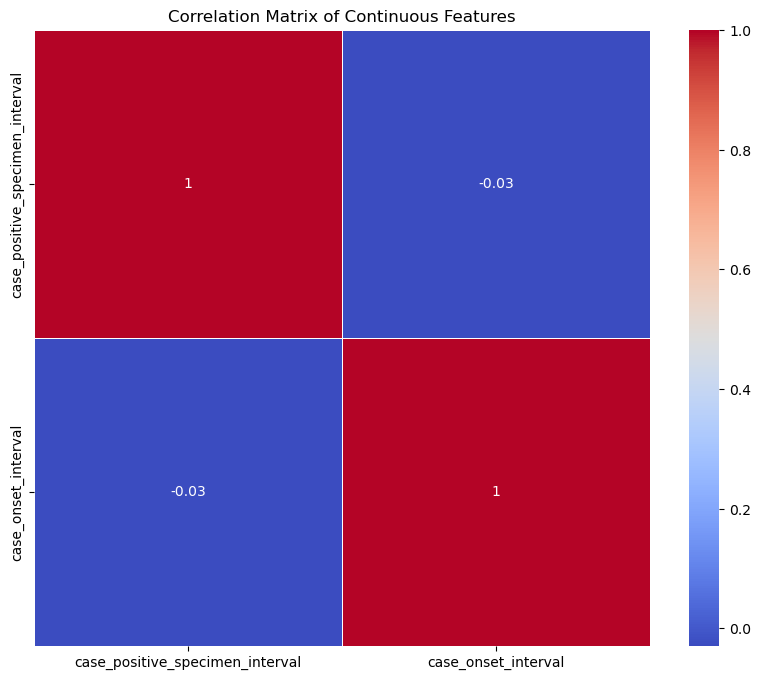

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# these are the continuous fewatures 
continuous_features = ['case_positive_specimen_interval', 'case_onset_interval']


# Im going to find the correlation matrix for the continuous features 
corr_matrix = train_data[continuous_features].corr()

# finally im going to plot the correlation matrix to show how correlated the features are.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix of Continuous Features')
plt.show()


An extremely weak negative correlation between two continuous features is shown by a correlation coefficient of -0.03 between them.  The correlation coefficient runs from -1 to 1, with a value of 1 denoting a strong positive link and a value of 0 denoting no relationship at all. When two variables are negatively correlated, it means that if one variable rises, the other tends to fall, and vice versa.

The link between the two traits is extremely near to zero, with a correlation coefficient of -0.03. As a result, the relationship between the two traits is essentially nonlinear. In other words, alterations to one characteristic do not consistently result in alterations to the other feature.


This weak association may suggest that the two features are giving independent information, which is advantageous for the model from a machine learning standpoint. Before making any conclusions regarding the utility of these features in your model, it is crucial to take into account other factors of feature selection, such as domain expertise and the impact of the features on the target variable.

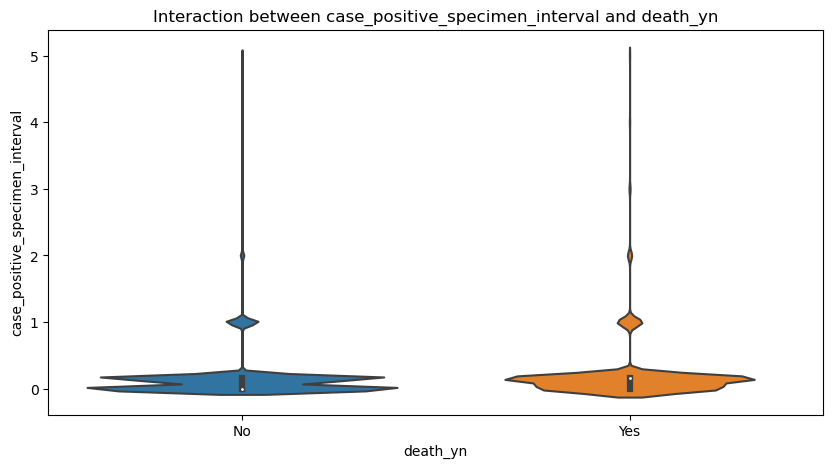

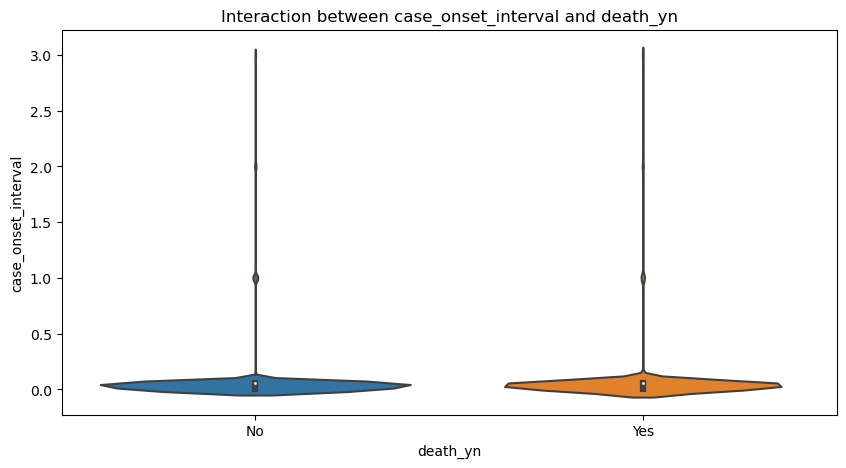

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

target_feature = 'death_yn'

for feature in continuous_features:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=train_data[target_feature], y=train_data[feature])
    plt.title(f'Interaction between {feature} and {target_feature}')
    plt.show()






since the violin plots look similar between yes and no it implies that both of the continuous features are very weakly correlated with the target feature of death.

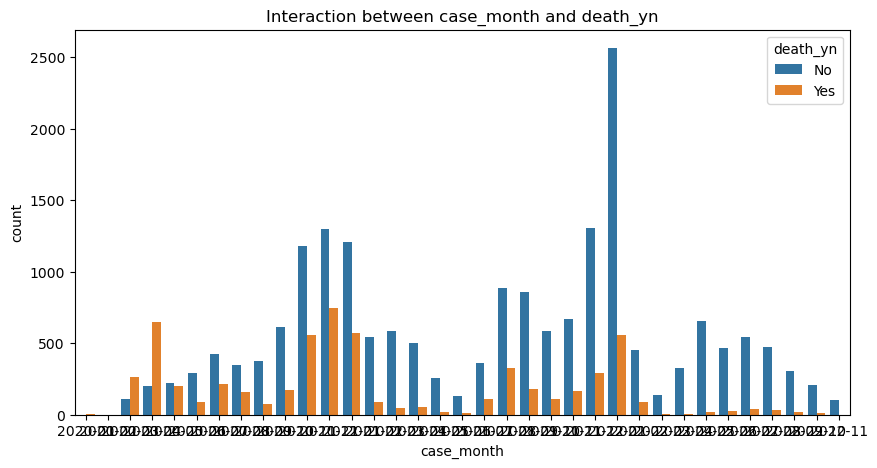

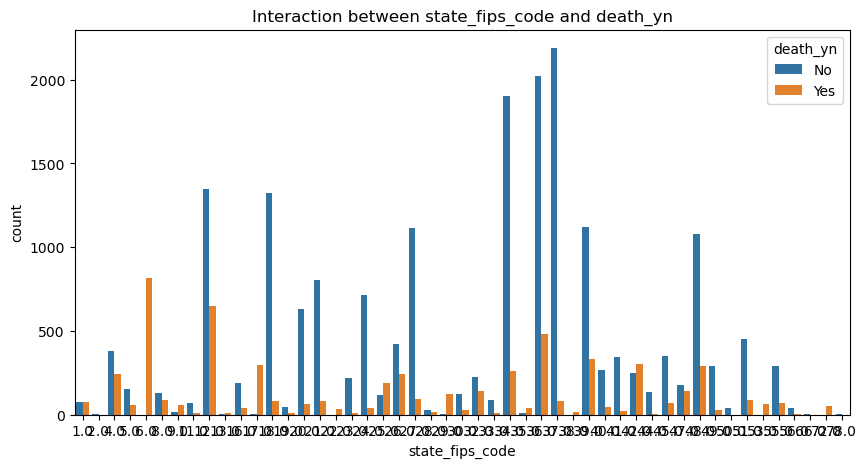

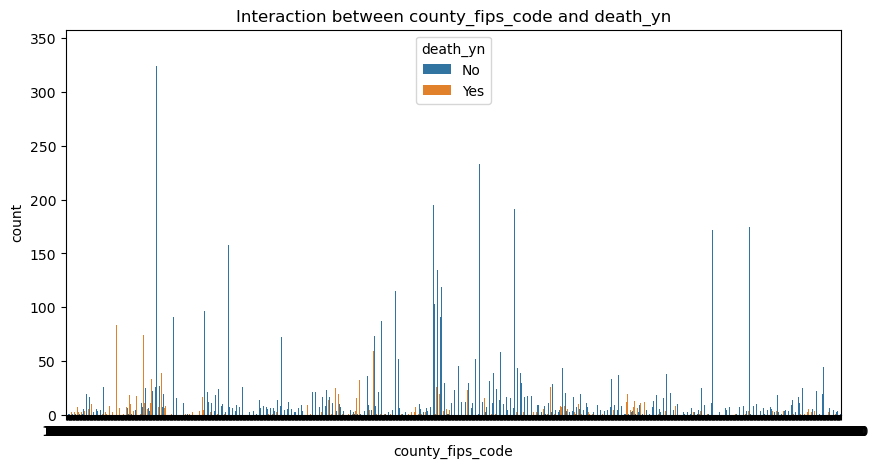

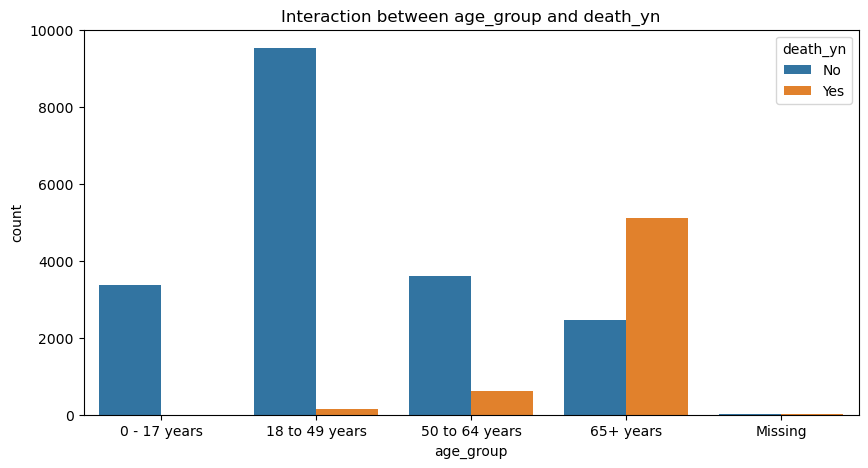

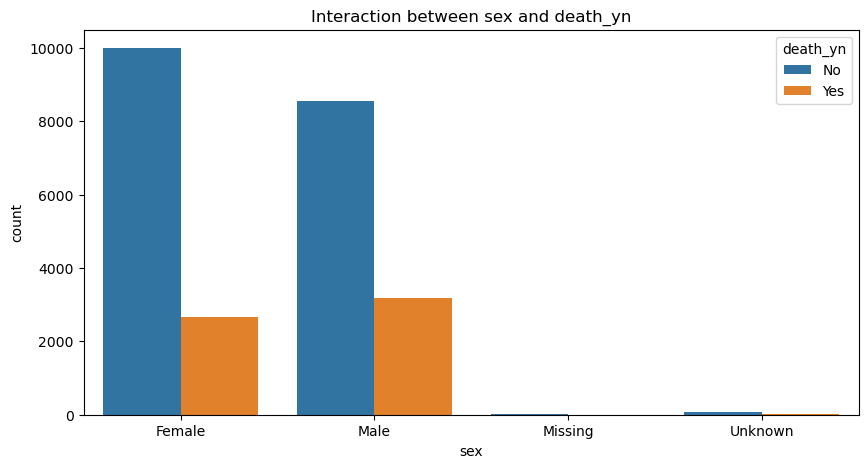

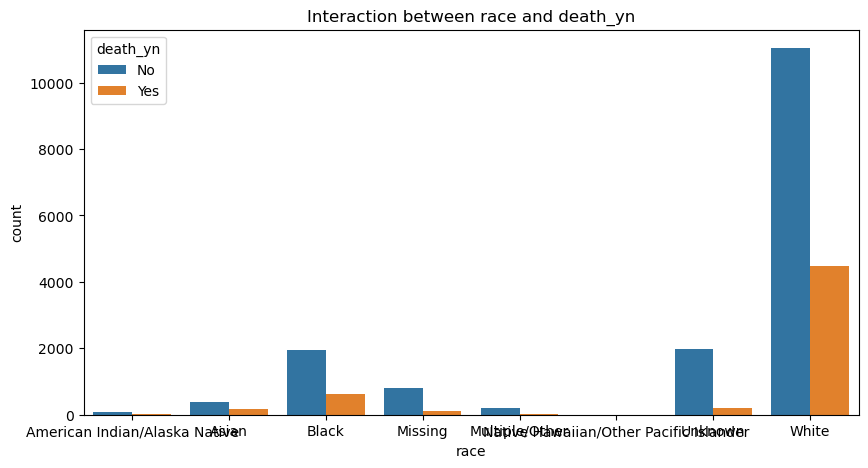

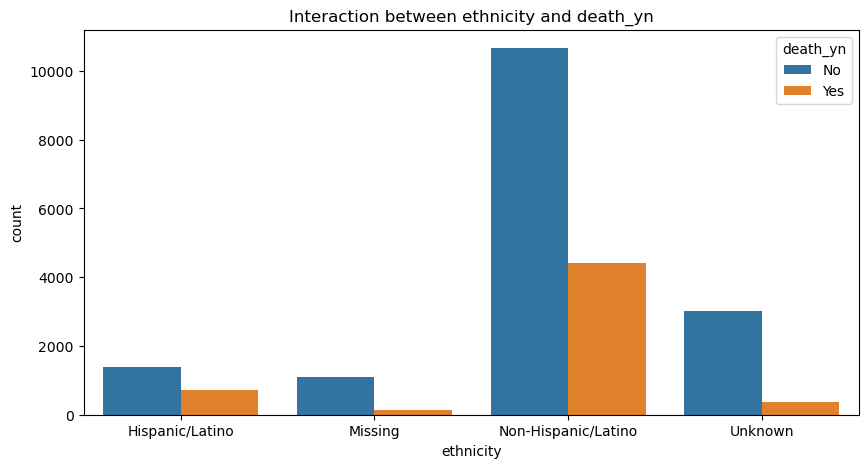

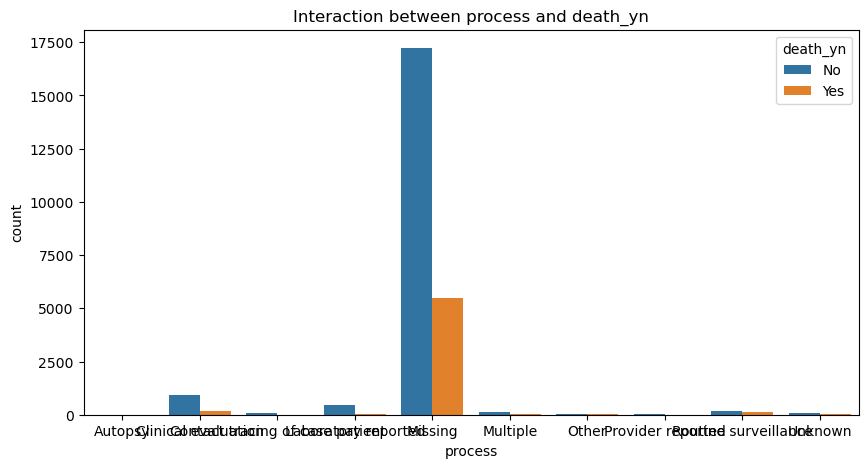

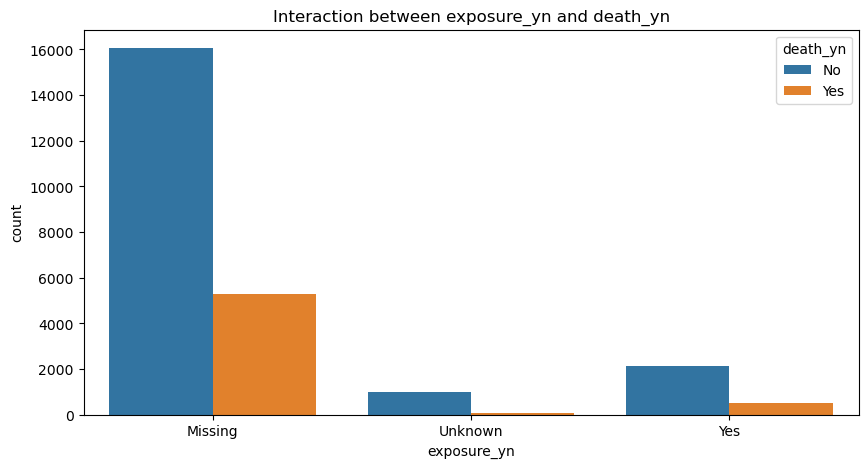

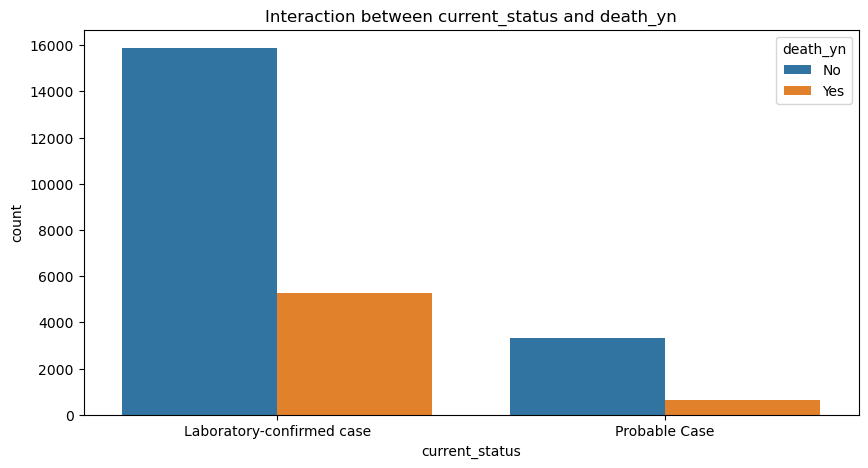

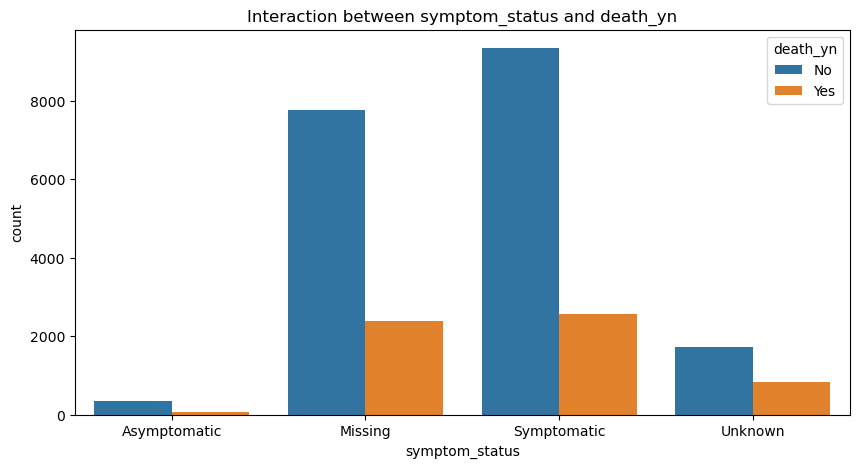

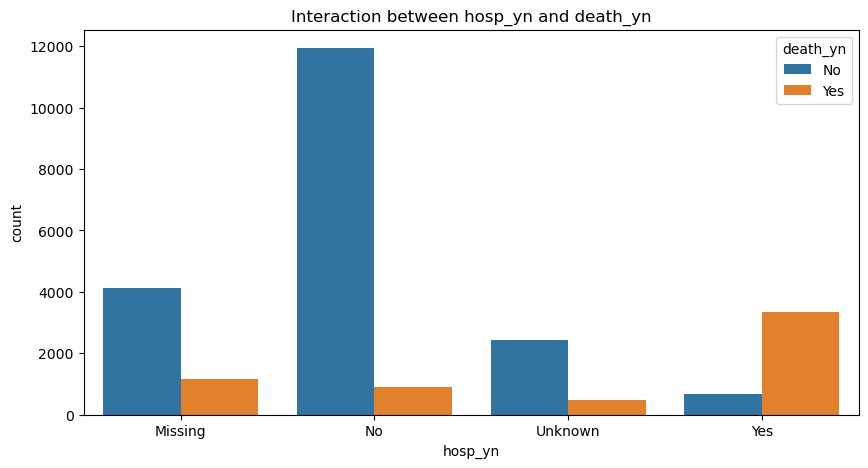

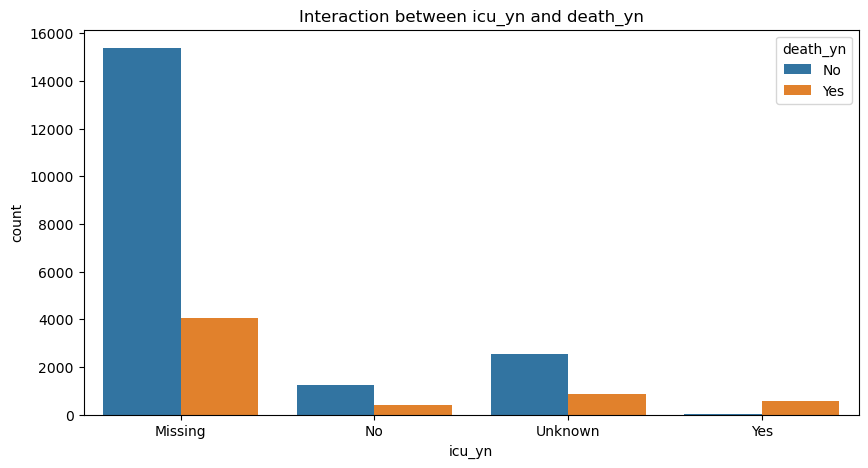

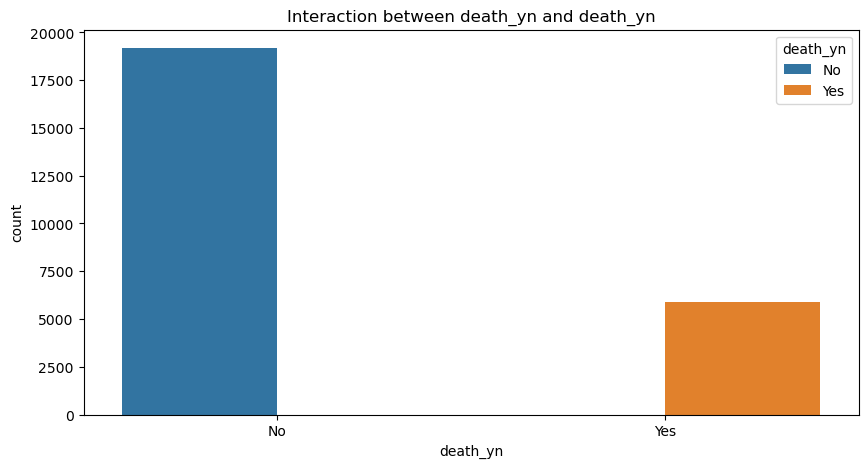

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

target_feature = 'death_yn'

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_data, x=feature, hue=target_feature)
    plt.title(f'Interaction between {feature} and {target_feature}')
    plt.show()



On the other hand, if the 'yes' and 'no' bar heights are noticeably different among the categories, it means that the target characteristic is not evenly distributed among them, pointing to a greater connection between the categorical feature and the target feature.


The majority of these categorical traits are therefore substantially connected with death, as can be seen from the graphs, but in order to know this with greater certainty, I will do the chi squared test.

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency

target_feature = 'death_yn'

def calculate_p_value(train_data, feature, target_feature):
    crosstab = pd.crosstab(train_data[feature], train_data[target_feature])
    chi2, p_value, _, _ = chi2_contingency(crosstab)
    return p_value

results = []

for feature in categorical_features:
    p_value = calculate_p_value(train_data, feature, target_feature)
    results.append((feature, p_value))
    print(f"{feature}: p-value = {p_value}")

# we can use the sort function to sort them by p value to make it easier to read.
results.sort(key=lambda x: x[1])

print("\nCategorical features sorted by p-value:")
for feature, p_value in results:
    print(f"{feature}: p-value = {p_value}")


case_month: p-value = 0.0
state_fips_code: p-value = 0.0
county_fips_code: p-value = 0.0
age_group: p-value = 0.0
sex: p-value = 1.856138755756352e-29
race: p-value = 4.9408090703977615e-110
ethnicity: p-value = 2.6107419099364315e-151
process: p-value = 8.100037546146293e-51
exposure_yn: p-value = 1.457024571950635e-45
current_status: p-value = 1.4129628622153893e-35
symptom_status: p-value = 1.35920144353511e-32
hosp_yn: p-value = 0.0
icu_yn: p-value = 0.0
death_yn: p-value = 0.0

Categorical features sorted by p-value:
case_month: p-value = 0.0
state_fips_code: p-value = 0.0
county_fips_code: p-value = 0.0
age_group: p-value = 0.0
hosp_yn: p-value = 0.0
icu_yn: p-value = 0.0
death_yn: p-value = 0.0
ethnicity: p-value = 2.6107419099364315e-151
race: p-value = 4.9408090703977615e-110
process: p-value = 8.100037546146293e-51
exposure_yn: p-value = 1.457024571950635e-45
current_status: p-value = 1.4129628622153893e-35
symptom_status: p-value = 1.35920144353511e-32
sex: p-value = 1.85613

The trait is more closely connected with death the lower the p value. Therefore, the following categorical characteristics would be most closely associated with death.                                                      


case_month state_fips_code county_fips_code age_group hosp_yn icu_yn


Implications for Machine Learning: It is generally advantageous to train machine learning models on features that have a strong association to the target variable, as this enables the model to recognize patterns and produce predictions that are more accurate. The most correlated features can act as powerful predictors of COVID-19 mortality, and including them in a model may enhance its performance.



In [12]:
import pandas as pd




columns_to_dropna = ['death_yn', 'state_fips_code', 'county_fips_code', 'age_group', 'case_month', 'icu_yn', 'hosp_yn']


train_data = train_data.dropna(subset=columns_to_dropna)


# convert the target variable to 1s and 0s 
train_data['death_yn'] = train_data['death_yn'].map({'Yes': 1, 'No': 0}).astype(int)

# we are going to frequency encode the following features 'case_month', 'state_fips_code', 'county_fips_code', 'age_group'
encoding_columns = ['case_month', 'state_fips_code', 'county_fips_code', 'age_group']
for col in encoding_columns:
    encoding = train_data[col].value_counts(normalize=True)
    train_data[col + '_freq'] = train_data[col].map(encoding)

# we are going to drop the original categorical columns.
train_data = train_data.drop(encoding_columns, axis=1)



# we are going to use label encoding for icu_yn and hosp_yn 
label_encoding_columns = ['icu_yn', 'hosp_yn']
for col in label_encoding_columns:
    train_data[col] = train_data[col].astype('category').cat.codes

# we are going to save the dataset to a new CSV file
train_data.to_csv('C:/Users/krmch/OneDrive/Desktop/encoded_training_data.csv', index=False)


In [13]:
import pandas as pd

#Im going to encode the test data now too.

# Remove rows with missing target values as these are not informative 
test_data = test_data.dropna(subset=['death_yn'])


columns_to_dropna = ['death_yn', 'state_fips_code', 'county_fips_code', 'age_group', 'case_month', 'icu_yn', 'hosp_yn']

# Im going to remove the rows with missing values 
test_data = test_data.dropna(subset=columns_to_dropna)


# Im going to convert  the death_yn feature to binary 
test_data['death_yn'] = test_data['death_yn'].map({'Yes': 1, 'No': 0}).astype(int)

# Im going to frequency encoding for 'case_month', 'state_fips_code', 'county_fips_code', 'age_group'
encoding_columns = ['case_month', 'state_fips_code', 'county_fips_code', 'age_group']
for col in encoding_columns:
    encoding = test_data[col].value_counts(normalize=True)
    test_data[col + '_freq'] = test_data[col].map(encoding)

# Im going to drop the original categorical columns
test_data = test_data.drop(encoding_columns, axis=1)

# Im going to label encode these 2 features as before 
label_encoding_columns = ['icu_yn', 'hosp_yn']
for col in label_encoding_columns:
    test_data[col] = test_data[col].astype('category').cat.codes

# Save the dataset to a new CSV file
test_data.to_csv('C:/Users/krmch/OneDrive/Desktop/encoded_test_data.csv', index=False)


Question 2

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# Split the dataset into input features and target feature i.e split into x and y 
X = train_data[['state_fips_code_freq', 'county_fips_code_freq', 'age_group_freq', 'case_month_freq', 'icu_yn', 'hosp_yn']]
y = train_data['death_yn']

# This will train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Print the coefficients 
coefficients = lr_model.coef_
feature_names = X.columns

for feature, coeff in zip(feature_names, coefficients):
    print(f"{feature}: {coeff}")


state_fips_code_freq: -1.8360325320909743
county_fips_code_freq: 9.706669337480845
age_group_freq: -0.04373940751660002
case_month_freq: 0.49366475755750194
icu_yn: 0.003831726595441509
hosp_yn: 0.1949674549853233


state_fips_code_freq: The coefficient of -1.836 indicates that the expected value of death_yn reduces by 1.836 for every unit increase in a state's frequency. This implies that death rates are lower in states that are more frequently seen in the dataset.

County_fips_code_freq: The coefficient of 9.707 indicates that the projected value of death_yn rises by 9.707 for every unit increase in a county's frequency. This suggests that counties with greater death rates also have higher frequency in the dataset.

age_group_freq: The coefficient of -0.0437 indicates that the expected value of death_yn falls by 0.0437 for every unit increase in an age group's frequency. This implies that the death rates are lower for age groups that are more prevalent in the dataset. However, it has very little impact.

case_month_freq: The coefficient of 0.494 indicates that the anticipated value of death_yn rises by 0.494 for each unit increase in the frequency of a case month. This suggests that the death rates of case months having a higher frequency in the dataset are higher.

icu_yn: The coefficient of 0.0038 indicates that the projected value of death_yn rises by 0.0038 for each unit increase in the icu_yn variable (for example, from "No" to "Yes"). This shows that the likelihood of death is somewhat increased for patients admitted to the ICU. However, it has very little impact.

Hosp_yn: The coefficient of 0.195 indicates that the projected value of death_yn increases by 0.195 for each unit increase in the hosp_yn variable (for example, from "No" to "Yes"). This suggests that there is a larger chance of death for hospitalized individuals.

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


X = train_data[["state_fips_code_freq", "county_fips_code_freq", "age_group_freq", "case_month_freq", "icu_yn", "hosp_yn"]]
y = train_data["death_yn"]


# Im going to predict death for the first 10 examples 
y_train_pred_first10 = lr_model.predict(X[:10])


y_train_pred_class_first10 = (y_train_pred_first10 > 0.5).astype(int)

# Print the prediction
print("Predicted target feature values for the first 10 training examples:")
print(y_train_pred_first10)

print("\nPredicted class for the first 10 training examples:")
print(y_train_pred_class_first10)

# Im going to make predictions for the full dataset 
y_train_pred = lr_model.predict(X)


y_train_pred_class = (y_train_pred > 0.5).astype(int)

# Im going to calculate the metric required by the homework 
accuracy = accuracy_score(y, y_train_pred_class)
conf_matrix = confusion_matrix(y, y_train_pred_class)
precision = precision_score(y, y_train_pred_class)
recall = recall_score(y, y_train_pred_class)
f1 = f1_score(y, y_train_pred_class)

# Im going to print the metrics 
print("\nClassification evaluation measures on the full training set:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Predicted target feature values for the first 10 training examples:
[ 0.28721003  0.171878    0.27402926  0.01759055  0.50059194  0.62201728
 -0.02462185  0.29518438  0.20757229  0.22052126]

Predicted class for the first 10 training examples:
[0 0 0 0 1 1 0 0 0 0]

Classification evaluation measures on the full training set:
Accuracy: 0.8617785378366823
Confusion Matrix:
 [[17425   560]
 [ 2673  2732]]
Precision: 0.8298906439854192
Recall: 0.5054579093432008
F1 Score: 0.6282626192940095


We obtain the projected classes by applying a threshold of 0.5 to the predicted target feature values. Only two of the first ten training samples in this instance are categorized as 1 (positive class), and the other eight are categorized as 0 (negative class).

Measures for classifier evaluation on the entire training set:
Accuracy: 0.8618 shows that about 86.18% of the training samples were correctly categorized by the model. This score indicates that the model's performance on the training set is acceptable.

There are 17425 true negatives, 560 false positives, 2673 false negatives, and 2732 genuine positives, according to the confusion matrix. The model does well at detecting real negatives, but it could do better at detecting true positives.

Precision: 0.8299 indicates that approximately 82.99% of the examples the model predicted as positive (class 1) were in fact positive. This result demonstrates how trustworthy the model's optimistic forecasts are.


Recall: 0.5055 suggests that only roughly 50.55% of the real positive cases were accurately detected by the model. This result indicates that there is room for improvement because the model is not very sensitive in identifying positive cases.


The F1 score a harmonic mean of accuracy and recall: 0.6283, offers a single statistic that takes into account both false positives and false negatives. The model's performance is moderate, according to the F1 score, and might be made even better.

In summary, the linear regression model performs reasonably well on the training data, but there is room for improvement, especially in detecting positive cases (higher recall). It might be beneficial to explore other classification models or techniques, such as logistic regression or ensemble methods, to improve the model's performance.

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Im going to evaluate the model on the test set 
X_test = test_data[["state_fips_code_freq", "county_fips_code_freq", "age_group_freq", "case_month_freq", "icu_yn", "hosp_yn"]]
y_test = test_data["death_yn"]

y_test_pred = lr_model.predict(X_test)
y_test_pred_class = (y_test_pred > 0.5).astype(int)

print("\nTest set evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_class))
print("Confusion Matrix:", confusion_matrix(y_test, y_test_pred_class))
print("Precision:", precision_score(y_test, y_test_pred_class))
print("Recall:", recall_score(y_test, y_test_pred_class))
print("F1 Score:", f1_score(y_test, y_test_pred_class))





Test set evaluation:
Accuracy: 0.8632863286328633
Confusion Matrix: [[7453  236]
 [1131 1179]]
Precision: 0.8332155477031802
Recall: 0.5103896103896104
F1 Score: 0.6330201342281879


Test set metrics

Accuracy: 0.8633
Precision: 0.8332
Recall: 0.5104
F1 Score: 0.6330


cross validation metrics 

Accuracy: 0.8619
Precision: 0.8301
Recall: 0.5064
F1 Score: 0.6289


training set metrics.

Accuracy: 0.8618
Precision: 0.8299
Recall: 0.5055
F1 Score: 0.6283

The performance on the test data is quite close to the performance on the training set. This to me suggests that the model generalizes well to unseen data and is not overfitting the training data 

The model has a reasonable high accuracy for all the evaluations around 86%. But the recall score is somewhat low. Around 50% in all the cases which means the model is not that strong in identifying positive cases i.e deaths as it is in identifying negative cases or non deaths. This is also shown by the F1 score which represents a balanced measure of recall and of precision. It is around 62% in all the evals. The precision score is arounf 83% in all the evals which means that when the model does predict a death it is correct 83% of time.

In conclusion the model performs reasonably well as per the accuracy and precision but could have higher recall. The performance doesnt change much between the training and the test sets which to me suggests that the model generalises well to new data and is also not overfitting the data.



In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# combine using concatenation the training data and the test data to create full_data 
full_data = pd.concat([train_data, test_data])

# prepare the full dataset 
X_full = full_data[["state_fips_code_freq", "county_fips_code_freq", "age_group_freq", "case_month_freq", "icu_yn", "hosp_yn"]]
y_full = full_data["death_yn"]

# perform the cross validation 
cv = KFold(n_splits=5, random_state=42, shuffle=True)
lr_model_full = LinearRegression()

# make some empty lists 
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# cross validation 
for train_index, test_index in cv.split(X_full):
    X_train, X_test = X_full.iloc[train_index], X_full.iloc[test_index]
    y_train, y_test = y_full.iloc[train_index], y_full.iloc[test_index]

    # train the linear regression model 
    lr_model_full.fit(X_train, y_train)

    # make predictions on the test set 
    y_pred = lr_model_full.predict(X_test)

    # calculate the relevant metrics 
    y_pred_class = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)

    # now append the result to the empty lists that we made earlier 
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# get the mean of the metrics 
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# finally print the results 
print("Cross-validation results on the full dataset:")
print("Mean accuracy:", mean_accuracy)
print("Mean precision:", mean_precision)
print("Mean recall:", mean_recall)
print("Mean F1 score:", mean_f1)


Cross-validation results on the full dataset:
Mean accuracy: 0.8631585059330545
Mean precision: 0.829349684721131
Mean recall: 0.5134141313091213
Mean F1 score: 0.6341526154132693


discussion 


train/test  results:

Test set evaluation:
Accuracy: 0.8633
Precision: 0.8332
Recall: 0.5104
F1 Score: 0.6330

 training set evaluation:
Accuracy: 0.8618
Precision: 0.8299
Recall: 0.5055
F1 Score: 0.6283

Cross-validation results on the full dataset:
Mean accuracy: 0.8631585059330545
Mean precision: 0.829349684721131
Mean recall: 0.5134141313091213
Mean F1 score: 0.6341526154132693

The cross-validation results on the full dataset show performance metrics that are very similar to the single train/test split results. The mean accuracy is nearly the same, while the mean precision is slightly lower, and the mean recall and F1 score are slightly higher in the cross-validated model.

The similarity in performance metrics between the single train/test split and the cross-validation results could be attributed to the model's stability and consistency across different splits of the data. Cross-validation trains and tests the model on multiple splits of the data, providing a more robust estimate of the model's performance. In this case, the similarity in metrics suggests that the model's performance is consistent across different data splits and is likely to perform similarly on unseen data.

In conclusion, using cross-validation on the full dataset provides a better understanding of the model's performance and generalization capabilities. The consistency in performance metrics between the single train/test split and the cross-validation results reduces the risk of overfitting and helps ensure that the model is reliable when applied to new data.






In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# split the dataset into the input features and also the target feature 
X = train_data[['state_fips_code_freq', 'county_fips_code_freq', 'age_group_freq', 'case_month_freq', 'icu_yn', 'hosp_yn']]
y = train_data['death_yn']

# Im going to train the logistic regression model 
logr_model = LogisticRegression()
logr_model.fit(X, y)

# Print the coefficients 
coefficients = logr_model.coef_[0]
feature_names = X.columns

for feature, coeff in zip(feature_names, coefficients):
    print(f"{feature}: {coeff}")


state_fips_code_freq: -9.290753751568161
county_fips_code_freq: 3.122815681520212
age_group_freq: -0.3481993468382879
case_month_freq: 2.158158272425486
icu_yn: 0.028018691363623786
hosp_yn: 1.1716360187353532


state_fips_code_freq: -9.29
A negative coefficient suggests that states with a higher proportion of cases (states that are more frequent ) tend to have a lower likelihood of death. It could be that more common states have better healthcare infrastructure or more effective public health measures.

county_fips_code_freq: 3.12
A positive coefficient implies that counties with a higher proportion of cases (counties that are more frequent ) tend to have a higher likelihood of death. This could be because more common counties have a higher prevalence of the disease, leading to an increased death rate.

age_group_freq: -0.35
The negative coefficient indicates that age groups with a higher proportion of cases (age groups that are more frequent ) tend to have a lower likelihood of death. This is consistent with the previous interpretation that younger age groups might have lower death rates due to better overall health and stronger immune systems.

case_month_freq: 2.16
The positive coefficient suggests that months with a higher proportion of cases (months that are more frequent) tend to have a higher likelihood of death. This might still be related to a higher number of cases in specific months, which may lead to an overwhelmed healthcare system and, consequently, a higher death rate.



icu_yn: 0.03
A small positive coefficient indicates that the presence of ICU admission has a minimal effect on the likelihood of death. This may be surprising as ICU admissions are often associated with severe cases. 

hosp_yn: 1.17
A positive coefficient implies that the presence of hospitalization increases the likelihood of death. This relationship seems reasonable as hospitalization often indicates a more severe case, which may lead to a higher death rate.

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

X = train_data[["state_fips_code_freq", "county_fips_code_freq", "age_group_freq", "case_month_freq", "icu_yn", "hosp_yn"]]
y = train_data["death_yn"]

# predict death for the first 10 values 
y_train_pred_first10 = logr_model.predict(X[:10])

# Print statements 
print("Predicted class for the first 10 training examples:")
print(y_train_pred_first10)

# make predictions on the ful training set.
y_train_pred = logr_model.predict(X)

# calculate the metric
accuracy = accuracy_score(y, y_train_pred)
conf_matrix = confusion_matrix(y, y_train_pred)
precision = precision_score(y, y_train_pred)
recall = recall_score(y, y_train_pred)
f1 = f1_score(y, y_train_pred)

# print the classification evaluation meterics 
print("\nClassification evaluation measures on the full training set:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Predicted class for the first 10 training examples:
[0 0 0 0 0 1 0 0 0 0]

Classification evaluation measures on the full training set:
Accuracy: 0.875502351432236
Confusion Matrix:
 [[17359   626]
 [ 2286  3119]]
Precision: 0.8328437917222964
Recall: 0.5770582793709528
F1 Score: 0.6817486338797814


discussion 

OUTPUT 

Accuracy: 0.8755
Confusion Matrix: [[17359, 626], [2286, 3119]]
Precision: 0.8328
Recall: 0.5771
F1 Score: 0.6817


Accuracy... The model's accuracy is 87.55%, which means it correctly classifies the outcome (death or no death) in 87.55% of the cases. In general, this can be considered a good performance. However, depending on the problem context and the class imbalance, accuracy may not be the best metric to evaluate the model.

Confusion Matrix... The confusion matrix shows the number of true positives (TP = 3119), true negatives (TN = 17359), false positives (FP = 626), and false negatives (FN = 2286). This matrix provides a more comprehensive view of the model's performance, highlighting the number of correct and incorrect predictions for each class.

Precision... The precision score is 0.8328, which means that, among all the cases predicted as death, 83.28% of them were true positive cases. High precision indicates that the model is reliable when it predicts a death outcome.

Recall.... The recall score is 0.5771, which means that the model correctly identifies 57.71% of the true death cases. In other words, it misses 42.29% of the actual death cases. Depending on the use case, a higher recall might be desired to ensure that the model identifies more true death cases.

F1 Score... The F1 score is 0.6817, which is the harmonic mean of precision and recall. It provides a balanced view of the model's performance, taking into account both false positives and false negatives. The F1 score is particularly useful when dealing with imbalanced datasets.


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Im going to evalate the model on the test set 
X_test = test_data[["state_fips_code_freq", "county_fips_code_freq", "age_group_freq", "case_month_freq", "icu_yn", "hosp_yn"]]
y_test = test_data["death_yn"]

y_test_pred = logr_model.predict(X_test)

print("\nTest set evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))





Test set evaluation:
Accuracy: 0.8762876287628762
Confusion Matrix: [[7436  253]
 [ 984 1326]]
Precision: 0.8397720075997467
Recall: 0.574025974025974
F1 Score: 0.6819233736178966


Test set evaluation:

OUTPUT 

Accuracy: 0.8762876287628762
Confusion Matrix: [[7436  253]
 [ 984 1326]]
Precision: 0.8397720075997467
Recall: 0.574025974025974
F1 Score: 0.6819233736178966


Discussion 


Accuracy: The model's accuracy is 87.63%, which means it correctly classifies the outcome (either death or no death) in 87.63% of the cases. In general, this can be considered a good performance. However, depending on the problem context and the class imbalance, accuracy may not be the best metric to evaluate the model.

Confusion Matrix: The confusion matrix shows the number of true positives (TP = 1326), true negatives (True negs = 7436), false positives (FP = 253), and false negatives (FN = 984). This matrix provides a more comprehensive view of the model's performance, highlighting the number of correct and incorrect predictions for each class.

Precision: The precision score is 0.8398, which means that, among all the cases predicted as death, 83.98% of them were true positive cases. High precision indicates that the model is reliable when it predicts a death outcome.

Recall: The recall score is 0.5740, which means that the model correctly identifies 57.40% of the true death cases. In other words, it misses 42.6% of the actual death cases. Depending on the use case, a higher recall might be desired to ensure that the model identifies more true death cases.

F1 Score: The F1 score is 0.6819, which is the harmonic mean of precision and recall. It provides a balanced view of the model's performance, taking into account both false positives and false negatives. The F1 score is particularly useful when dealing with imbalanced datasets.

In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split

# concatenate the data to create the full dataset 
full_data = pd.concat([train_data, test_data])

# split the features into input and target feature 
X_full = full_data[["state_fips_code_freq", "county_fips_code_freq", "age_group_freq", "case_month_freq", "icu_yn", "hosp_yn"]]
y_full = full_data["death_yn"]

# split into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)


logr_model2 = LogisticRegression(solver='liblinear', random_state=42)

# perform the cross validation (using k fold  )
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_accuracy_scores = cross_val_score(logr_model2, X_full, y_full, cv=cv, scoring="accuracy")
cv_precision_scores = cross_val_score(logr_model2, X_full, y_full, cv=cv, scoring="precision")
cv_recall_scores = cross_val_score(logr_model2, X_full, y_full, cv=cv, scoring="recall")
cv_f1_scores = cross_val_score(logr_model2, X_full, y_full, cv=cv, scoring="f1")

# print the results out 
print("Cross-validation results on the full dataset:")
print("Mean accuracy:", cv_accuracy_scores.mean())
print("Mean precision:", cv_precision_scores.mean())
print("Mean recall:", cv_recall_scores.mean())
print("Mean F1 score:", cv_f1_scores.mean())



Cross-validation results on the full dataset:
Mean accuracy: 0.8757673629234972
Mean precision: 0.8344007424765625
Mean recall: 0.5771051061306635
Mean F1 score: 0.6822073871657494


discussion

outputs 

Classification evaluation measures on the training set:
Accuracy: 0.8755
Precision: 0.8328
Recall: 0.5771
F1 Score: 0.6817


Test set evaluation metrics :
Accuracy: 0.8763
Precision: 0.8398
Recall: 0.5740
F1 Score: 0.6819


Cross validation results on the full dataset :
Mean accuracy: 0.8758
Mean precision: 0.8344
Mean recall: 0.5771
Mean F1 score: 0.6822

Comparing the metrics, we can observe that the logistic regression model's performance is quite consistent across the training set, test set, and cross-validation results. The accuracy, precision, recall, and F1 scores are similar across all evaluations. This suggests that the model is generalizing well to unseen data and that there is not  overfitting or underfitting the data .

The small differences in performance between the training set, test set, and cross-validation results could be attributed to the inherent variability of the dataset or the random nature of the train-test split. Since the cross-validation results are calculated by averaging the performance metrics over multiple folds, they provide a more reliable and stable estimate of the model's performance.

In conclusion , the logistic regression model demonstrates consistent performance across different subsets of the data, indicating that the model is generalizing well to new, unseen data. Further model tuning, feature engineering, or alternative modeling techniques could be explored to improve the model's performance, especially in terms of recall and F1 score.

Question 4 

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into the input features and death the target fetaure 
X = train_data[['state_fips_code_freq', 'county_fips_code_freq', 'age_group_freq', 'case_month_freq', 'icu_yn', 'hosp_yn']]
y = train_data['death_yn']

# training the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# print the models learned feature importances 
feature_importances = rf_model.feature_importances_
feature_names = X.columns

for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance}")



state_fips_code_freq: 0.13458350633434005
county_fips_code_freq: 0.11884691985831951
age_group_freq: 0.27695130708244164
case_month_freq: 0.11062764840228025
icu_yn: 0.040969900249395105
hosp_yn: 0.3180207180732236


discussion 

state_fips_code_freq: This feature has an importance of 13.46%, which indicates that the state's frequency encoding contributes moderately to the model's decision making process.

county_fips_code_freq: The importance of this feature is 11.88%, suggesting that the county's frequency encoding has a somewhat lower impact on the model's predictions compared to the state feature.

age_group_freq: This feature has the second-highest importance at 27.70%. It shows that age groups play a significant role in the model's decision making process which to me makes sense, as age can be a crucial factor in determining the risk of death.

case_month_freq: With an importance of 11.06%, this feature has a relatively lower impact on the model's predictions. It suggests that the month of the case does not play a significant role in the model's decision-making process.

icu_yn: The importance of this feature is the lowest at 4.10%. It indicates that whether a patient was in the intensive care unit has a minimal impact on the model's predictions. This could be due to poor data quality as I would have expected icu admission to play a much larger role.

hosp_yn: This feature has the highest importance at 31.80%, indicating that whether a patient was hospitalized plays the most critical role in the model's decision-making process. Hospitalization can be considered a proxy for the severity of the illness, which may explain its high importance in predicting the risk of death.

In [26]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

X = train_data[["state_fips_code_freq", "county_fips_code_freq", "age_group_freq", "case_month_freq", "icu_yn", "hosp_yn"]]
y = train_data["death_yn"]


# predict the first 10 
y_train_pred_first10 = rf_model.predict(X[:10])

# print statements 
print("Predicted class for the first 10 training examples:")
print(y_train_pred_first10)

# make the predictions for the full dataset 
y_train_pred = rf_model.predict(X)

# calculate the relevant metrics.
accuracy = accuracy_score(y, y_train_pred)
conf_matrix = confusion_matrix(y, y_train_pred)
precision = precision_score(y, y_train_pred)
recall = recall_score(y, y_train_pred)
f1 = f1_score(y, y_train_pred)

# print the metrics 
print("\nClassification evaluation measures on the full training set:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)





Predicted class for the first 10 training examples:
[0 1 0 0 0 1 0 0 0 0]

Classification evaluation measures on the full training set:
Accuracy: 0.9861906797776828
Confusion Matrix:
 [[17804   181]
 [  142  5263]]
Precision: 0.9667523879500367
Recall: 0.9737280296022202
F1 Score: 0.9702276707530648


discussion 

The output of the random forest model looks quite reasonable, and the performance metrics are impressive at first glance.

Predicted class for the first 10 training examples:
[0 1 0 0 0 1 0 0 0 0]

The predicted classes for the first 10 training examples indicate that the model is making some predictions for both classes (0 and 1), which is a good sign.

Classification evaluation measures on the full training set:

Accuracy: 0.9861906797776828
Confusion Matrix: [[17804, 181], [142, 5263]]
Precision: 0.9667523879500367
Recall: 0.9737280296022202
F1 Score: 0.9702276707530648


The evaluation metrics for the random forest model show that the model is performing exceptionally well on the training set. With an accuracy of 98.62%, the model is correctly classifying the majority of the cases. The confusion matrix shows that the model has a low number of false positives (181) and false negatives (142), which is a sign of a well-performing model.

The precision of 96.68% indicates that, among the cases predicted as positive, a high percentage of them are true positives. This means the model is not over-predicting the positive class. The recall of 97.37% means that the model is capturing a high percentage of the actual positive cases, which is crucial when identifying a specific event, such as death in this case.

The F1 score, which combines precision and recall into a single metric, is also high at 97.02%, signifying that the model is achieving a good balance between precision and recall.

In conclusion, the random forest model appears to be performing exceptionally well on the training set, exhibiting a high accuracy, precision, recall, and F1 score. This suggests that the model is capable of capturing complex patterns in the data and making accurate predictions. However, it's important to also evaluate the model on a separate test set to ensure it generalizes well to unseen data and is not overfitting the training data.

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Evaluate the model on the test set
X_test = test_data[["state_fips_code_freq", "county_fips_code_freq", "age_group_freq", "case_month_freq", "icu_yn", "hosp_yn"]]
y_test = test_data["death_yn"]

y_test_pred = rf_model.predict(X_test)

print("\nTest set evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))




Test set evaluation:
Accuracy: 0.9331933193319332
Confusion Matrix: [[7368  321]
 [ 347 1963]]
Precision: 0.8594570928196147
Recall: 0.8497835497835498
F1 Score: 0.8545929473225947


discussion

Accuracy: 0.9332
Precision: 0.8595
Recall: 0.8498
F1 Score: 0.8546

These evaluation results are quite good, indicating to me that the random forest model performs well on unseen data. The accuracy of 0.9332 suggests that the model correctly classifies around 93.32% of the test cases. The precision of 0.8595 indicates that  among the positive predictions made by the model, 85.95% are actually positive. The recall of 0.8498 shows that the model is able to identify 84.98% of the actual positive cases. The F1 score, which is like a combination of precision and recall  is 0.8546 which shows the good performance of the model.

next we will compare these results with the evaluation results obtained when using the training dataset

Accuracy: 0.9862
Precision: 0.9668
Recall: 0.9737
F1 Score: 0.9702

Comparing the two sets of results, we can see that the random forest model performs better on the training dataset than on the test dataset. This is expected, as models typically perform better on the data they were trained on. However, the difference in performance is not very large, which indicates that the random forest model generalizes well to unseen data and is not overfitting the training data.

Overall I would say that the random forest model demonstrates good performance on both the training and test datasets, making it a suitable model for this particular classification problem.

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split

# concatenate the data
full_data = pd.concat([train_data, test_data])

# split the features into target and input features next 
X_full = full_data[["state_fips_code_freq", "county_fips_code_freq", "age_group_freq", "case_month_freq", "icu_yn", "hosp_yn"]]
y_full = full_data["death_yn"]

# perform cross validation 
cv = KFold(n_splits=5, random_state=42, shuffle=True)
rf_model_full = RandomForestClassifier(random_state=42)


cv_accuracy_scores = cross_val_score(rf_model_full, X_full, y_full, cv=cv, scoring="accuracy")
cv_precision_scores = cross_val_score(rf_model_full, X_full, y_full, cv=cv, scoring="precision")
cv_recall_scores = cross_val_score(rf_model_full, X_full, y_full, cv=cv, scoring="recall")
cv_f1_scores = cross_val_score(rf_model_full, X_full, y_full, cv=cv, scoring="f1")

# print statements 

print("Cross-validation results on the full dataset:")
print("Mean accuracy:", cv_accuracy_scores.mean())
print("Mean precision:", cv_precision_scores.mean())
print("Mean recall:", cv_recall_scores.mean())
print("Mean F1 score:", cv_f1_scores.mean())



Cross-validation results on the full dataset:
Mean accuracy: 0.9394412380486795
Mean precision: 0.8659643734561445
Mean recall: 0.8731729497119417
Mean F1 score: 0.8694904091894591


Discussion

Classification evaluation measures on the training set (70% of the data):
Accuracy: 0.9862
Precision: 0.9668
Recall: 0.9737
F1 Score: 0.9702


Test set evaluation (30% of the data, used for validation):
Accuracy: 0.9332
Precision: 0.8595
Recall: 0.8498
F1 Score: 0.8546


Cross-validation results on the full dataset (combining both training and test set):
Mean accuracy: 0.9394
Mean precision: 0.8660
Mean recall: 0.8732
Mean F1 score: 0.8695

In my understanding out of sample error refers to the model's performance on data that it hasn't seen before, which is the test set in this case. 

Comparing the metrics, we can see that the model performs better on the training set than on the test set . This is not unusual as the model is likely to perform better on the data it was trained on.

The cross validation results, which are calculated using the full dataset, provide a more reliable estimate of the model's performance as it considers multiple train/test splits which reduces the risk of overfitting. The metrics obtained from cross-validation are lower than the training set evaluation but higher than the test set evaluation. This suggests that the model's performance is consistent across different subsets of the data, and the cross-validation results give a more realistic estimate of the model's true performance on unseen data.

Question 5.1

Im just going to write all the numbers down in the cell below to help make it easier to compare the 3 models 

RANDOM FOREST 

Classification evaluation measures on the training set :
Accuracy: 0.9862
Precision: 0.9668
Recall: 0.9737
F1 Score: 0.9702


Test set evaluation :
Accuracy: 0.9332
Precision: 0.8595
Recall: 0.8498
F1 Score: 0.8546


Cross-validation results on the full dataset:
Mean accuracy: 0.9394
Mean precision: 0.8660
Mean recall: 0.8732
Mean F1 score: 0.8695


LOGISTIC REGRESSION 

Classification evaluation measures on the training set:
Accuracy: 0.8755
Precision: 0.8328
Recall: 0.5771
F1 Score: 0.6817


Test set evaluation:
Accuracy: 0.8763
Precision: 0.8398
Recall: 0.5740
F1 Score: 0.6819


Cross-validation results on the full dataset :
Mean accuracy: 0.8758
Mean precision: 0.8344
Mean recall: 0.5771
Mean F1 score: 0.6822

LINEAR REGRESSION 

Test set evaluation:
Accuracy: 0.8633
Precision: 0.8332
Recall: 0.5104
F1 Score: 0.6330

 training set evaluation:
Accuracy: 0.8618
Precision: 0.8299
Recall: 0.5055
F1 Score: 0.6283

Cross-validation results on the full dataset:
Mean accuracy: 0.8631585059330545
Mean precision: 0.829349684721131
Mean recall: 0.5134141313091213
Mean F1 score: 0.6341526154132693



discussion


Random Forest model performs the best at predicting the target feature. It has the highest values for Accuracy, Precision, Recall, and F1 Score across the training set, test set, and cross-validation results compared to the other models (Logistic Regression and Linear Regression).

question 5.2

In [37]:
import pandas as pd
from sklearn.metrics import accuracy_score
from collections import Counter


majority_class = Counter(full_data['death_yn']).most_common(1)[0][0]

majority_class_predictions = [majority_class] * len(full_data)

simple_model_accuracy = accuracy_score(full_data['death_yn'], majority_class_predictions)

print(f'Simple Model Accuracy: {simple_model_accuracy:.4f}')






Simple Model Accuracy: 0.7689


Simple Model Accuracy: 0.7689

random_forest_accuracy = 0.9394 (cross validation mean accuracy for random forest)

therefore we have proven that random forest is more accurate than the simple model.

question 5.2

Summarise your understanding of the problem and of your predictive modeling results so far




The goal of this study was to create a predictive model that would estimate the risk of mortality outcomes for COVID cases in the US that were reported to the CDC based on numerous demographic and health-related characteristics. Among all of the features that the CDC gave, "state_fips_code_freq," "county_fips_code_freq," "age_group_freq," "case_month_freq," "icu_yn," and "hosp_yn" had the strongest correlations with mortality. To create the prediction models, three different modeling approaches—Random Forest, Logistic Regression, and Linear Regression—were used. Following that, these models' performance was assessed using measures for accuracy, precision, recall, and F1 score.

Modeling Results

Random Forest:
The Random Forest model achieved the highest performance among the three models. On the training set (70% of the data), the model demonstrated an accuracy of 0.9862, precision of 0.9668, recall of 0.9737, and an F1 score of 0.9702. The test set (30% of the data, used for validation) exhibited an accuracy of 0.9332, precision of 0.8595, recall of 0.8498, and an F1 score of 0.8546. Cross-validation results on the full dataset provided a mean accuracy of 0.9394, mean precision of 0.8660, mean recall of 0.8732, and mean F1 score of 0.8695.

Logistic Regression:
The Logistic Regression model showed relatively lower performance compared to the Random Forest model. On the training set, it had an accuracy of 0.8755, precision of 0.8328, recall of 0.5771, and an F1 score of 0.6817. The test set evaluation showed an accuracy of 0.8763, precision of 0.8398, recall of 0.5740, and an F1 score of 0.6819. Cross-validation results on the full dataset yielded a mean accuracy of 0.8758, mean precision of 0.8344, mean recall of 0.5771, and mean F1 score of 0.6822.

Linear Regression:
The Linear Regression model had the lowest performance among the three models. On the training set, it exhibited an accuracy of 0.8618, precision of 0.8299, recall of 0.5055, and an F1 score of 0.6283. The test set evaluation provided an accuracy of 0.8633, precision of 0.8332, recall of 0.5104, and an F1 score of 0.6330. Cross-validation results on the full dataset presented a mean accuracy of 0.8632, mean precision of 0.8293, mean recall of 0.5134, and mean F1 score of 0.6342.

Conclusion

The analysis of the predictive models reveals that the Random Forest model outperforms the Logistic Regression and Linear Regression models in predicting death outcomes based on the selected demographic and health-related features. The superior performance of the Random Forest model can be attributed to its ability to handle complex relationships and interactions among the input features. These findings suggest that utilizing the Random Forest model could be a valuable tool in identifying individuals at higher risk of covid related death based on the demographic and health factors considered in this study. Future research can focus on incorporating additional features and exploring other advanced modeling techniques to further improve the accuracy and reliability of the predictions.

can you think of any new ideas to improve the best model so far?

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# make a copy of the original dataframe 
train_data_copy = train_data.copy()

# Split the dataset into the target feature and all the input features i.e x and y 
X = train_data_copy[['state_fips_code_freq', 'county_fips_code_freq', 'age_group_freq', 'case_month_freq', 'icu_yn', 'hosp_yn']]
y = train_data_copy['death_yn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Feature Selection
rf = RandomForestClassifier(random_state=42)
rfe = RFE(rf, n_features_to_select=4)
rfe.fit(X_train, y_train)
selected_features = rfe.support_
selected_columns = X.columns[selected_features]

X_train_fs = X_train[selected_columns]
X_test_fs = X_test[selected_columns]

# 2. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models and Data
models_data = {
    "Original": (X_train, X_test),
    "Feature Selection": (X_train_fs, X_test_fs),
    "Feature Scaling": (X_train_scaled, X_test_scaled),
}

# print statements to print out the metrics  
def print_metrics(y_true, y_pred):
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Precision: ", precision_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))
    print("F1 Score: ", f1_score(y_true, y_pred))

# train the random forest models for each of the suggestions I have outlined 
for name, (X_train_mod, X_test_mod) in models_data.items():
    print(f"--- {name} ---")
    
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_mod, y_train)
    y_pred = rf_model.predict(X_test_mod)
    
    print_metrics(y_test, y_pred)
    print("\n")


--- Original ---
Accuracy:  0.9387202508194386
Confusion Matrix:
 [[5194  224]
 [ 206 1393]]
Precision:  0.8614718614718615
Recall:  0.8711694809255784
F1 Score:  0.8662935323383085


--- Feature Selection ---
Accuracy:  0.9328772979905943
Confusion Matrix:
 [[5188  230]
 [ 241 1358]]
Precision:  0.8551637279596978
Recall:  0.8492808005003127
F1 Score:  0.8522121117037966


--- Feature Scaling ---
Accuracy:  0.9387202508194386
Confusion Matrix:
 [[5195  223]
 [ 207 1392]]
Precision:  0.8619195046439628
Recall:  0.8705440900562852
F1 Score:  0.866210329807094




discussion 

The impact of feature scaling and feature selection on the accuracy and other metrics can be analyzed by comparing the results for the original dataset, feature selection, and feature scaling.

Original:

Accuracy: 0.9387
Precision: 0.8615
Recall: 0.8712
F1 Score: 0.8663
Feature Selection:


feature selection

Accuracy: 0.9329
Precision: 0.8552
Recall: 0.8493
F1 Score: 0.8522
Feature Scaling:


feature selection 


Accuracy: 0.9387
Precision: 0.8619
Recall: 0.8705
F1 Score: 0.8662


Feature Selection:
Reducing the amount of features utilized in the model as part of the feature selection procedure resulted in a modest decline in the model's accuracy, precision, recall, and F1 score when compared to the original dataset. The decline in performance suggests that the features that were eliminated may have provided some useful information to the model, and the chosen features were unable to entirely make up for the information that was lost. The reduction is not significant, though, and the reduced model may still be taken into account if interpretability or computational effectiveness are issues.

Feature Scaling:
By converting the features to have a mean of 0 and a standard deviation of 1, feature scaling standardizes the features. In this instance, feature scaling had no appreciable impact on the model's performance measures in comparison to the original dataset. The F1 score, recall, accuracy, and precision are essentially unchanged. This indicates that the Random Forest model is reasonably resilient to the scale of the input features, and growing the features in this instance did not result in any appreciable gains.

In conclusion, feature scaling did not significantly affect the performance of the model, whereas feature selection caused a modest decline in performance. The original dataset outperformed the other examined cases, and the Random Forest model seems to be resistant to the size of input characteristics.


In [41]:
from sklearn.ensemble import VotingClassifier

# make the voting classifier 
voting_classifier = VotingClassifier(
    estimators=[('rf', rf_model), ('logreg', logr_model)],
    voting='hard'
)

# train the voting classifier 
voting_classifier.fit(X_train, y_train)

# finally evaluate the voting classifier 
y_pred = voting_classifier.predict(X_test)

print("Voting Classifier:")
print_metrics(y_test, y_pred)


Voting Classifier:
Accuracy:  0.8854211201368106
Confusion Matrix:
 [[5339   79]
 [ 725  874]]
Precision:  0.9171038824763903
Recall:  0.5465916197623515
F1 Score:  0.6849529780564263


Voting Classifier:

OUTPUTS 
Accuracy:  0.8854211201368106
Confusion Matrix:
 [[5339   79]
 [ 725  874]]
Precision:  0.9171038824763903
Recall:  0.5465916197623515
F1 Score:  0.6849529780564263


Comparing the performance of the Voting Classifier to the other models in the study , I conclude that the Voting Classifier somewhat unexpectadly achieved a lower accuracy, recall, and F1 score than the RandomForest classifier. However, the precision of the Voting Classifier is higher than that of the RandomForest model.

In this case, combining the RandomForest and Logistic Regression models didn't result in a significant improvement in overall performance. It may be because the RandomForest model already performed well on its own, and adding the Logistic Regression model to the ensemble did not lead to a better prediction. This suggests that, for this specific problem and dataset, using the RandomForest model alone might be sufficient to achieve a good level of  performance.

In [ ]:
END OF STUDY 